<a href="https://colab.research.google.com/github/macruga/predictive-analytics/blob/main/Banking_assigment_Manuel_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
sns.set()

##Attribute Information:

Input variables:
### bank client data:

1 - age (numeric) \
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\
5 - default: has credit in default? (categorical: 'no','yes','unknown')\
6 - housing: has housing loan? (categorical: 'no','yes','unknown')\
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')\ 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). \
 Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) \
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) \
14 - previous: number of contacts performed before this campaign and for this client (numeric) \
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) \
17 - cons.price.idx: consumer price index - monthly indicator (numeric) \
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) \
19 - euribor3m: euribor 3 month rate - daily indicator (numeric) \
20 - nr.employed: number of employees - quarterly indicator (numeric) \

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Load data

In [4]:
banking_data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/banking.txt')

In [5]:
banking_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

## EDA

In [6]:
# Columns are inspected for nulls 
banking_data.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [7]:
banking_data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

Text(0.5, 0, 'Age')

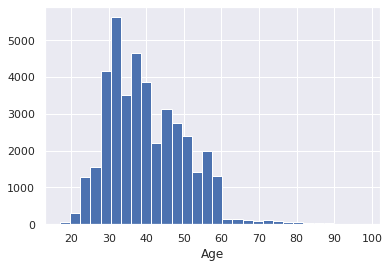

In [ ]:
banking_data['age'].hist(bins=30)
plt.xlabel('Age')

Text(0, 0.5, 'Frequency of Purchase')

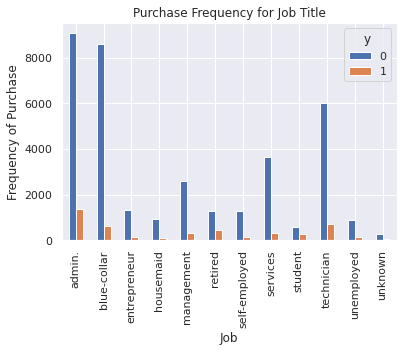

In [8]:
pd.crosstab(banking_data.job,banking_data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

### Job seems to be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

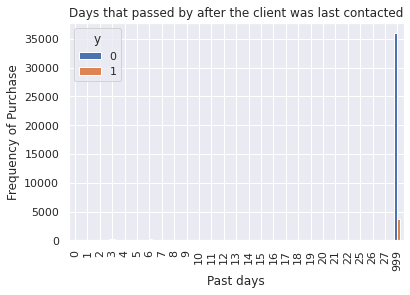

In [10]:
pd.crosstab(banking_data.pdays,banking_data.y).plot(kind='bar')
plt.title('Days that passed by after the client was last contacted')
plt.xlabel('Past days')
plt.ylabel('Frequency of Purchase')

### Pdays No seems good predictor

Text(0, 0.5, 'Frequency of Purchase')

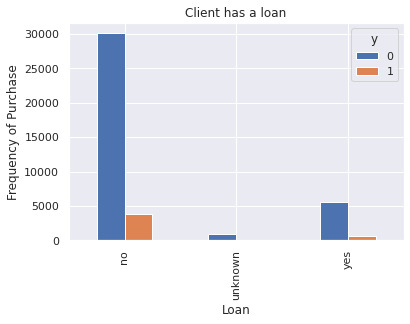

In [13]:
pd.crosstab(banking_data.loan,banking_data.y).plot(kind='bar')
plt.title('Client has a loan')
plt.xlabel('Loan')
plt.ylabel('Frequency of Purchase')

### Loan can be a good predictor

Text(0, 0.5, 'Frequency of Purchase')

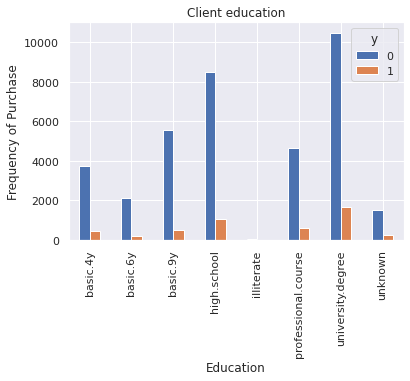

In [14]:
pd.crosstab(banking_data.education,banking_data.y).plot(kind='bar')
plt.title('Client education')
plt.xlabel('Education')
plt.ylabel('Frequency of Purchase')

### Education is a good predictor

### Rename basic education category 

In [16]:
banking_data.education = banking_data.education.str.replace('.9y', '', regex=True).replace('.6y', '', regex=True).replace('.4y', '', regex=True)

In [21]:
banking_data.sample(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
99,50,unemployed,married,professional.course,unknown,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
6386,48,blue-collar,married,basic,unknown,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
18766,33,management,single,university.degree,no,yes,no,cellular,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0


### Set dummies

In [22]:
banking_dummies = pd.get_dummies(banking_data, drop_first=True)
banking_dummies.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


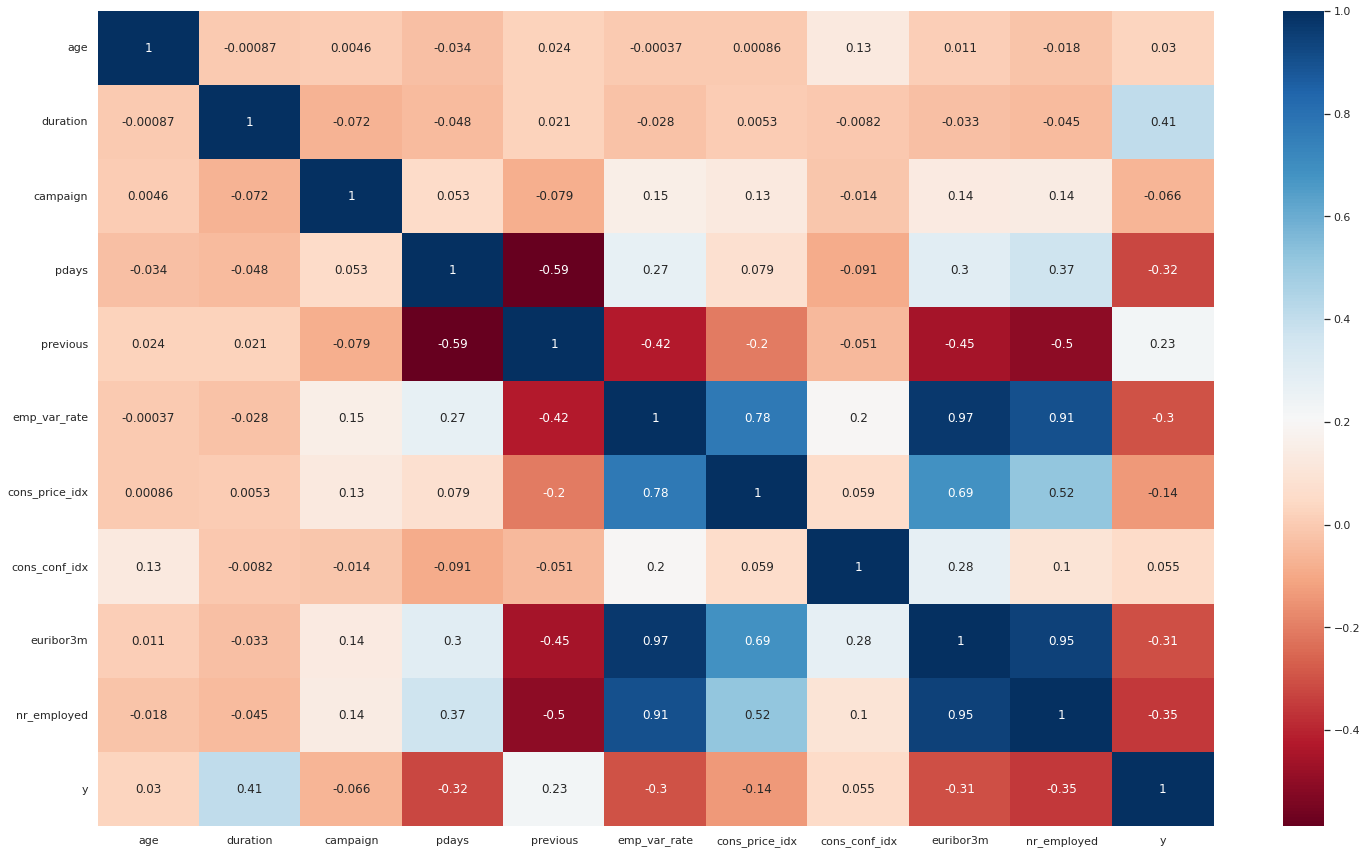

In [ ]:
plt.figure(figsize=(25,15)) 
sns.heatmap(banking_data.corr(), annot=True, cmap='RdBu') 

##Over-sampling 

In [41]:
X = banking_dummies.loc[:, banking_dummies.columns != 'y']
y = banking_dummies.loc[:, banking_dummies.columns == 'y']

In [43]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])


print("length of oversampled data is ",len(os_data_X))
print("No subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Success subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
No subscription in oversampled data 25567
Success subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [44]:
data_final_vars=banking_data.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

## Implementing the model

In [42]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [49]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'loan_yes', 
      'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [50]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.508619
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.266     
Dependent Variable:   y                 AIC:               52047.4518
Date:                 2022-04-13 21:00  BIC:               52188.9271
No. Observations:     51134             Log-Likelihood:    -26008.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.3939   0.0078  50.7647 0.0000  0.3787  0.4091
job_blue-collar 

## Splitting the dataset into the Training set and Test set

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [52]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


### Evaluating

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6879  787]
 [2009 5666]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      7666
           1       0.88      0.74      0.80      7675

    accuracy                           0.82     15341
   macro avg       0.83      0.82      0.82     15341
weighted avg       0.83      0.82      0.82     15341



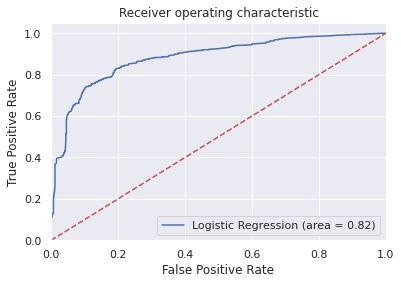

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()